# ⚒ Punkte einer *DataFrame* zufällig verschieben

Jetzt wo wir wissen, wie man einen einzelnen Punkt zufällig verschiebt können wir unsere *Function* auf die richtigen Daten, die Zeckenstiche, anwenden. Die ist Schritt 2 in unserem Schema:

- Schritt 1: Einen Einzelpunkt zufällig verschieben ✓
- **Schritt 2: Alle Punkte einer DataFrame zufällig verschieben (1 "Run")**
- Schritt 3: Alle Punkte einer DataFrame mehrfach zufällig verschieben (z.B. 50 "Runs")
- Schritt 4: Anteil der Punkte im Wald pro "Run" ermitteln
- Schritt 5: Verteilung dieser Mittelwerte visualisieren 

Lade hierzu die nötigen Module und importiere die Zeckenstichdaten

In [21]:
import pandas as pd
import random

def offset_coordinate(old, distance = 100):
    new = old + random.normalvariate(0,distance)

    return(new)

# mit "head(10)" importiere ich nur die ersten 10 Einträge des CSV. So kann ich den Workflow erstmal an einem kleineren Datensatz testen.
zeckenstiche = pd.read_csv("zeckenstiche.csv").head(10)


zeckenstiche

,ID,accuracy,x,y
0,0,65.617154,2678971.0,1240824.0
1,1,257.492052,2679837.0,1240858.0
2,2,163.533834,2687539.0,1240881.0
3,3,185.000000,2674848.0,1240913.0
4,4,228.215231,2681771.0,1240922.0
5,5,257.492053,2690119.0,1240932.0
6,6,17.951638,2678477.0,1240956.0
7,7,287.211395,2687505.0,1241029.0
8,8,301.748542,2681288.0,1241081.0
9,9,301.748542,2681268.0,1241111.0


## Übung 1: Alle Zeckenstiche zufällig verschieben

Um in *DataFrames* / *GeoDataFrames* ganze Spalten oder Zeilen zu verändern, stehen einem die *Methods* `map`, `apply` und `applymap` zur Verfügung. Es lohnt sich sehr, die verschiedenen Anwendungsbereiche dieser *Methods* kennen zu lernen, doch das würde den Umfang dieses Kurses überschreiten. Heute brauchen wir lediglich `apply`, welches wir einmal auf die `x`- und einmal auf die `y`-Spalte unserer *DataFrame* anwenden. 
Um unsere eigene Function `offset_coordinate` auf die Spalten anzuwenden gehst du wie folgt vor: Selektiere die entsprechende Spalte (mit `["spaltenname"]`) und verwende die Method apply mit der selbst erstellt Function point_offset als einziges Argument, und zwar ohne Klammer. 

In [10]:
# Musterlösung

zeckenstiche["x"].apply(offset_coordinate)
zeckenstiche["y"].apply(offset_coordinate)

0    1.240936e+06
1    1.240802e+06
2    1.240812e+06
3    1.240744e+06
4    1.240842e+06
Name: y, dtype: float64

## Übung 2: Neue GeoDataFrame mit simulierten Punkten erstellen

Was bei `apply()` rauskommt, sind nur die neuen, verschobenen Punkte. Um diese abzuspeichern erstellen wir neue Spalten in `zeckenstiche` namen `x_sim`/`y_sim`:

In [23]:
# Musterlösung

zeckenstiche["x_sim"] = zeckenstiche["x"].apply(offset_coordinate)
zeckenstiche["y_sim"] = zeckenstiche["y"].apply(offset_coordinate)

zeckenstiche

,ID,accuracy,x,y,x_sim,y_sim
0,0,65.617154,2678971.0,1240824.0,2.678872e+06,1.241000e+06
1,1,257.492052,2679837.0,1240858.0,2.679613e+06,1.240965e+06
2,2,163.533834,2687539.0,1240881.0,2.687497e+06,1.241049e+06
3,3,185.000000,2674848.0,1240913.0,2.674818e+06,1.240775e+06
4,4,228.215231,2681771.0,1240922.0,2.681765e+06,1.240570e+06
5,5,257.492053,2690119.0,1240932.0,2.690078e+06,1.240843e+06
6,6,17.951638,2678477.0,1240956.0,2.678440e+06,1.241082e+06
7,7,287.211395,2687505.0,1241029.0,2.687479e+06,1.241010e+06
8,8,301.748542,2681288.0,1241081.0,2.681338e+06,1.241135e+06
9,9,301.748542,2681268.0,1241111.0,2.681112e+06,1.241050e+06


## Übung 4: Mehrere *DataFrames* visualisieren

Um zwei *DataFrames* im gleichen Plot darzustellen, wird folgendermassen vorgegangen. Der erste Datensatz wird mit `.plot()` visualisiert, wobei der Output einer Variabel  (z.B. `basemap`)  zugewiesen wird. Danach wird der zweite Datensatz ebenfalls mit `.plot()` visualisiert, wobei auf den ersten Plot via dem Argument `ax` verwiesen wird.

<AxesSubplot:xlabel='x_sim', ylabel='y_sim'>

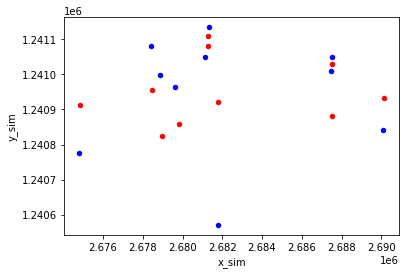

In [27]:
%matplotlib inline # Könnt ihr ignorieren

# Musterlösung

basemap = zeckenstiche.plot.scatter("x", "y", color = "red")
zeckenstiche.plot.scatter("x_sim", "y_sim", ax = basemap, color = "blue")